In [64]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr, chi2_contingency
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import matthews_corrcoef
from scipy import stats

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [2]:
water_data = pd.read_table('water.txt')

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [4]:
water_data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [5]:
water_data.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [12]:
print ('Pearson correlation coefficient between mortality and hardness variables equals to %.4f' % water_data['mortality'].corr(water_data['hardness']))

Pearson correlation coefficient between mortality and hardness variables equals to -0.6548


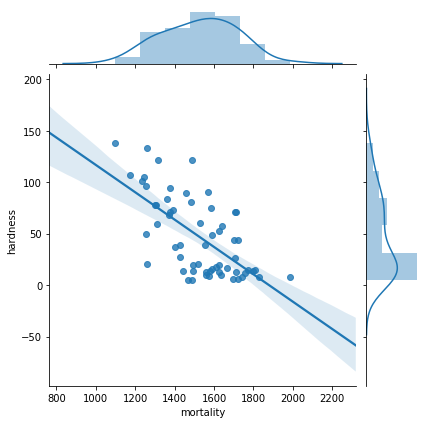

In [46]:
sns.jointplot(water_data['mortality'], water_data['hardness'], water_data, kind='reg')

В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [21]:
print('spearman correlation coefficient equals to %.4f' % spearmanr(water_data['hardness'], water_data['mortality'])[0])

spearman correlation coefficient equals to -0.6317


Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [37]:
water_data_s = water_data[water_data['location'] == 'South']
water_data_n = water_data[water_data['location'] == 'North']
pearson_south = pearsonr(water_data_s['hardness'], water_data_s['mortality'])[0]
pearson_north = pearsonr(water_data_n['hardness'], water_data_n['mortality'])[0]
if abs(pearson_south) < abs(pearson_north):
    print 'Water in the south is less dependent to hardness than water in the north with absolute value %.4f' % abs(pearson_south)
else:
    print 'Water in the north is less dependent to hardness than water in the south with absolute value %.4f' % abs(pearson_north)

Water in the north is less dependent to hardness than water in the south with absolute value 0.3686


Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [47]:
sex_visits = np.array([[203., 239.], [718., 515.]])
def matthewsr(a, b, c, d):
    return (a * d - b * c) / np.sqrt((a + b) * (a + c) * (b + d) * (c + d))

In [49]:
print('MCC equals to %.4f' % matthewsr(*sex_visits.ravel()))

MCC equals to -0.1090


В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили 5.5\times10^{-8}5.5×10 
−8
 , нужно ввести 8).

In [60]:
print'p-value equals to {}'.format(chi2_contingency(sex_visits)[1])

p-value equals to 1.05589870066e-05


In [65]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = sample1[0] / np.sum(sample1)
    p2 = sample2[0] / np.sum(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    
    return (left_boundary, right_boundary)


In [66]:
print('95%% confidence interval for a difference of men and women: [%.4f, %.4f]' %
      proportions_diff_confint_ind(sex_visits[:,1], sex_visits[:,0]))

95% confidence interval for a difference of men and women: [0.0539, 0.1392]


Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [67]:

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = np.sum(sample1)
    n2 = np.sum(sample2)
    
    p1 = sample1[0] / n1
    p2 = sample2[0] / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [68]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [83]:
print('p-value: %f' % proportions_diff_z_test(proportions_diff_z_stat_ind(sex_visits[:,1], sex_visits[:,0])))

p-value: 0.000008


Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

Не доволен Более или менее Доволен

Не очень счастлив 197 111 33

Достаточно счастлив 382 685 331

Очень счастлив 110 342 333

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [86]:
happiness_level = np.array([[197., 111., 33.],
                           [382., 685., 331.],
                           [110., 342., 333.]])

In [89]:
print 'chi squared statistic equals to %.4f '% chi2_contingency(happiness_level)[0]

chi squared statistic equals to 293.6831 


In [91]:
print 'p-value equals to {}'.format(chi2_contingency(happiness_level)[1])

p-value equals to 2.49642995801e-62


In [94]:
def cramers_statistic(matrix):
    chi2 = stats.chi2_contingency(matrix)[0]
    n = matrix.sum()
    return np.sqrt(chi2 / (n*(min(matrix.shape)-1)))

In [95]:
print('V Cramer statistic value equals to %.4f' % cramers_statistic(happiness_level))

V Cramer statistic value equals to 0.2412
